In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.patches as patches
import os
import glob
import seaborn as sns
from scipy import stats
import statsmodels.stats.api as sms
import cv2
gait_dir = '/Users/iwoods/Documents/GitHub/gait/'
this_dir = os.getcwd()
os.chdir(gait_dir)
import gaitFunctions
from gaitFunctions import pairwiseStats
import combineClips
import plotClip
os.chdir(this_dir)
def meanstdstr(vals):
    return str(np.round(np.mean(vals),2)) + ' ± ' + str(np.round(np.std(vals),2))

In [2]:
# plot colors and parameters
axis_fontsize=11
tick_fontsize=9

# colors for step kinematics
stance_color = '#5656ff'
swing_color = '#e1e813'
duty_color = '#4d4d4d'
ipsi_color = 'tab:red'
contra_color = 'tab:green'

# colors for legs
first_pair_color = '#b45eff' # lavender
first_pair_color_alt = '#661f99' # purple
second_pair_color = '#006f2a' # green
second_pair_color_alt = '#02db55' # light green
third_pair_color = '#ffd500' # yellow
third_pair_color_alt = '#fa9805' # orange
rear_leg_color = '#00b6eb'# light blue
rear_leg_color_alt = '#0010eb' # dark blue

# scatter marker size and alpha
marker_size = 10
marker_alpha = 0.7
marker_color = 'k'

# Option 1: Select the folders to include in the analysis ... (or see below)

In [3]:
# # navigate to directory that contains the data
# main_dir = '/Users/iwoods/OneDrive - Ithaca College/2024_movement_disorder_paper/videos_disulfiram/'
# os.chdir(main_dir)
# # list directories within this directory
# dirs = []
# for dirname, dirnames, filenames in os.walk('.'):
#     # print path to all subdirectories first.
#     for subdirname in dirnames:
#         folder = os.path.join(dirname, subdirname).split('/')[1]
#         if folder not in dirs:
#             dirs.append(folder)
# dirs = np.sort(np.unique(np.array(dirs)))
# dirs = [x for x in dirs if 'disulfiram' in x.lower()] # change to babies or adults or ramazzottius or disulfiram
# folders_in_analysis = gaitFunctions.selectMultipleFromList(dirs) 

# Option 2: Manually select the folders

In [ ]:
main_dir = '/Users/iwoods/OneDrive - Ithaca College/2024_movement_disorder_paper/'
base_dir = '/Users/iwoods/Library/CloudStorage/OneDrive-IthacaCollege/2024_movement_disorder_paper/'
folders_in_analysis = [base_dir + 'videos_disulfiram/Disulfiram 12Jan24 Inverted',
                       base_dir + 'videos_disulfiram/Disulfiram 13Dec23 Inverted',
                       base_dir + 'videos_disulfiram/Disulfiram 16Dec22 Inverted',
                       base_dir + 'videos_disulfiram/Disulfiram 8Dec22 Inverted',
]
control = 'control'
experimental = 'disulfiram'

In [3]:
main_dir = '/Users/iwoods/OneDrive - Ithaca College/2024_movement_disorder_paper/'
base_dir = '/Users/iwoods/Library/CloudStorage/OneDrive-IthacaCollege/2024_movement_disorder_paper/'
folders_in_analysis = [base_dir + 'videos_wild/ramazzottius_14Sep23',
                       base_dir + 'videos_wild/ramazzottius_21Sep23',
                       base_dir + 'videos_exemplaris/iw_11Dec23_exemplaris_inverted',
                       base_dir + 'videos_exemplaris/iw_18Jan24_exemplaris_inverted',
                       base_dir + 'videos_exemplaris/iw_21Dec23_exemplaris_inverted',
                       base_dir + 'videos_exemplaris/iw_9Nov23_exemplaris_inverted'
]
control = 'exemplaris'
experimental = 'ramazzottius'

In [ ]:
main_dir = '/Users/iwoods/OneDrive - Ithaca College/2024_movement_disorder_paper/'
base_dir = '/Users/iwoods/Library/CloudStorage/OneDrive-IthacaCollege/2024_movement_disorder_paper/'
folders_in_analysis = [base_dir + 'videos_babies/adults_28Nov',
                       base_dir + 'videos_babies/babies_15Sep',
]
control = 'adult'
experimental = 'juvenile'

# Load the data from the selected folders

In [4]:
### in each folder, look for a 'combined' excel file and load (or append) it to a dataframe
# if there is no 'combined' excel file, run combineClips and then load the file
os.chdir(main_dir)

path_summaries_df = pd.DataFrame()
step_timing_df = pd.DataFrame()
step_summaries_df = pd.DataFrame()
gait_summaries_df = pd.DataFrame()
gait_styles_speeds_df = pd.DataFrame()

def appendDF(original,new):
    if len(original) == 0:
        original = new
    else:
        new = pd.concat([original, new])
    return new

for folder in folders_in_analysis:
    os.chdir(folder)
    combined_files = sorted(glob.glob('*combined*xlsx'))
    if len(combined_files) == 0:
        print('Combining .xlsx files in ' + folder)
        pdf, stcdf, sdf, gdf, gssdf = combineClips.main(True)
    elif len(combined_files) == 1:
        excel_file = combined_files[0]
        print('Found ' + combined_files[0])
        
        # read in data from this excel file
        pdf = pd.read_excel(excel_file, sheet_name='path_summaries', index_col=None)
        stdf = pd.read_excel(excel_file, sheet_name='step_timing', index_col=None)
        sdf = pd.read_excel(excel_file, sheet_name='step_summaries', index_col=None)
        gdf = pd.read_excel(excel_file, sheet_name='gait_summaries', index_col=None)
        gssdf = pd.read_excel(excel_file, sheet_name='gait_speeds', index_col=None)
        
        # append to existing dataframe
        path_summaries_df = appendDF(path_summaries_df, pdf)
        step_timing_df = appendDF(step_timing_df, stdf)
        step_summaries_df = appendDF(step_summaries_df, sdf)
        gait_summaries_df = appendDF(gait_summaries_df, gdf)
        gait_styles_speeds_df = appendDF(gait_styles_speeds_df, gssdf)
    else:
        print('Too many "combined" files in ' + folder)
    os.chdir(main_dir)
path_summaries_df.head(5)

Found ramazzottius_14Sep23_combined.xlsx
Found ramazzottius_21Sep23_combined.xlsx
Found iw_11Dec23_exemplaris_inverted_combined.xlsx
Found iw_18Jan24_exemplaris_inverted_combined.xlsx
Found iw_21Dec23_exemplaris_inverted_combined.xlsx
Found iw_9Nov23_exemplaris_inverted_combined.xlsx


,Identifier,treatment,individual,date,Scale (pixels in 1mm),Body Size (mm^2),Body Length (mm),Body Width (mm),Body Width/Length Ratio,Duration analyzed (sec),...,Percentage of time cruising,Speed (mm/sec cruising),Speed (body lengths / sec cruising),Total bearing change (deg),Bearing change (deg) / sec,Bearing change (deg) / sec cruising,Number of stops,Stops / sec,Number of turns,Turns / sec
0,gbf_14sep_tardigrade01_ramazzottius,ramazzottius,tardigrade01,14sep,956.0300,0.018622,0.258572,0.103176,0.399024,144.6061,...,4.673093,NaN,NaN,1084.268267,7.498081,NaN,29,0.200545,10,0.069153
1,hp_14sep_tardigrade01_ramazzottius,ramazzottius,tardigrade01,14sep,956.0300,0.016372,0.239175,0.093667,0.391627,61.3030,...,58.724666,0.060339,0.252280,1980.887867,32.313066,22.174740,14,0.228374,11,0.179437
2,hp_14sep_tardigrade02_ramazzottius,ramazzottius,tardigrade02,14sep,956.0300,0.013376,0.212864,0.088790,0.417120,98.8182,...,34.437289,0.037130,0.174432,2391.306733,24.199052,29.209256,32,0.323827,14,0.141674
3,jc_14sep_tardigrade01_ramazzottius,ramazzottius,tardigrade01,14sep,956.0300,0.012101,0.205943,0.080448,0.390630,104.5757,...,2.463054,NaN,NaN,525.681200,5.026801,NaN,10,0.095625,4,0.038250
4,jc_14sep_tardigrade03_ramazzottius,ramazzottius,tardigrade03,14sep,956.0225,0.010959,0.193571,0.074888,0.386875,82.1819,...,77.617994,0.034471,0.178078,2180.828800,26.536607,17.203796,18,0.219026,9,0.109513


In [5]:
# col = 'Speed (body lengths / sec cruising)'
col = 'Body Length (mm)'
length_df = path_summaries_df[['Identifier',col,'treatment']]
c_length = np.nanmean(length_df[length_df['treatment']==control][col].values)
print(control, c_length)
e_length = np.nanmean(length_df[length_df['treatment']!=control][col].values)
print(experimental, e_length)
length_df[length_df['treatment']==control].sort_values(by=col)

exemplaris 0.2574411476902279
ramazzottius 0.22478822352618666


,Identifier,Body Length (mm),treatment
0,iw_9nov_tardigrade01_exemplaris,0.153164,exemplaris
9,iw_9nov_tardigrade10_exemplaris,0.187243,exemplaris
11,iw_9nov_tardigrade12_exemplaris,0.195196,exemplaris
8,iw_9nov_tardigrade09_exemplaris,0.204449,exemplaris
4,iw_9nov_tardigrade05_exemplaris,0.208070,exemplaris
2,iw_9nov_tardigrade03_exemplaris,0.215429,exemplaris
12,iw_21dec_tardigrade13_exemplaris,0.224095,exemplaris
13,iw_9nov_tardigrade14_exemplaris,0.224536,exemplaris
3,iw_18jan_tardigrade04_exemplaris,0.224846,exemplaris
5,iw_9nov_tardigrade06_exemplaris,0.225762,exemplaris


# Selecting data to analyze

In [6]:
# Path Data
print(path_summaries_df.columns)
path_cols =[
#     'Body Size (mm^2)', 
    'Body Length (mm)',
#     'Body Width (mm)', 
    'Body Width/Length Ratio', 
#     'Duration analyzed (sec)',
#     'Distance traveled (mm)', 
#     'Percentage of time cruising', # this is basically body length / sec, and inverse of stops / sec
#     'Speed (mm/sec)',
#     'Speed (body lengths / sec)', 
#     'Speed (mm/sec cruising)', 
    'Speed (body lengths / sec cruising)',
#     'Total bearing change (deg)', 
#     'Bearing change (deg) / sec',
    'Bearing change (deg) / sec cruising', 
#     'Number of stops', 
    'Stops / sec', # this is basically just the inverse of % cruising
#     'Number of turns', 
#     'Turns / sec'
]
print(len(path_cols))

Index(['Identifier', 'treatment', 'individual', 'date',
       'Scale (pixels in 1mm)', 'Body Size (mm^2)', 'Body Length (mm)',
       'Body Width (mm)', 'Body Width/Length Ratio', 'Duration analyzed (sec)',
       'Distance traveled (mm)', 'Speed (mm/sec)',
       'Speed (body lengths / sec)', 'Percentage of time cruising',
       'Speed (mm/sec cruising)', 'Speed (body lengths / sec cruising)',
       'Total bearing change (deg)', 'Bearing change (deg) / sec',
       'Bearing change (deg) / sec cruising', 'Number of stops', 'Stops / sec',
       'Number of turns', 'Turns / sec'],
      dtype='object')
5


In [8]:
# STEP KINEMATICS
# print(step_summaries_df.columns) # working need to update all of these - rerun analyzeSteps and combineClips
step_cols = [
    'Stance duration (lateral legs)', 
    'Swing duration (lateral legs)',
#     'Gait cycle (lateral legs)', 
#     'Duty factor (lateral legs)',
    'mm per step (lateral legs)', 
    'bodylength per step (lateral legs)',
    'Stance duration (rear legs)', 
    'Swing duration (rear legs)',
#     'Gait cycle (rear legs)', 
#     'Duty factor (rear legs)',
#     'mm per step (rear legs)', 
    'bodylength per step (rear legs)',
#     'Metachronal lag (lateral legs)',
#     'Metachronal lag (normalized, lateral legs)',
#     'Metachronal lag Abs (Left-Right Ratio)',
#     'Metachronal lag ratios per L3 step', # transformed this to
    'Abs MCL Ratio per L3',
#     'Bearing change per L3 step',
#     'Anterior swing offsets (lateral legs)',
    'Anterior swing offsets (normalized, lateral legs)',
#     'Opposite swing offsets (lateral legs)',
    'Opposite swing offsets (normalized, lateral legs)',
#     'Opposite swing offsets (rear legs)',
    'Opposite swing offsets (normalized, rear legs)']
print(len(step_cols))

11


In [9]:
print(step_summaries_df['Abs MCL Ratio per L3'].values)
print(step_summaries_df['Metachronal lag Abs (Left-Right Ratio)'].values)
# nan's and values should roughly match up ... 
# OK for disulfiram
# OK - ish ... for juveniles
# kinda weird for ramazzottius

[0.424      0.5111734  0.24807547 0.85177453 0.65206839 0.74323319
 0.28463523 0.79401159 0.5475232  0.14447283 0.55105354 0.39865915
 0.40413016 0.29088482 0.40812662 0.72593422 0.44712741 0.4447929
 0.33688388 0.62322493 0.41005094 0.30676576 0.94725302 0.65980104
 0.7579565  0.27935266 0.809063   0.46274754 0.17132932 0.2185225
 0.51165589 0.5923673  0.7226353  0.50642317 0.22843475 0.32067172
 0.53139856 0.30284024 0.88453387 0.47309092 0.2769305  0.37630206
 0.63334279 0.29748808 0.79723698 0.13560538 0.39066247 0.67188389
 0.30673889 0.50066933 0.63007336 0.12837489 0.1576344  0.97900602
 0.58662864 0.6172801  0.65743349 0.3781861  0.19999806 0.23594779
 0.1808639  0.29239659 0.7712189  0.34085281]
[0.02331908 0.58391488 0.03092151        nan 0.0661723  0.32727742
 0.07568383 0.14474381 0.41543631 0.00870948 0.52173519 0.01031237
 0.06808902 0.19478191 0.3450091  0.3017172  0.32323002 0.46908066
 0.07654155 0.31489264 0.41309584 0.10325486 0.734547   0.6006711
 0.72814036 0.16449

In [10]:
# GAIT STYLES
# print(gait_summaries_df.columns)
gait_cols = [
#     '% stand (lateral legs)',
#     '% pentapod (lateral legs)',
    '% tetrapod canonical (lateral legs)',
#     '% tetrapod gallop (lateral legs)', 
#     '% tetrapod other (lateral legs)',
#     '% tetrapod total (lateral legs)', 
    '% tripod canonical (lateral legs)',
#     '% tripod other (lateral legs)', 
#     '% tripod total (lateral legs',
#     '% other (lateral legs)',
#     '% stand (rear legs)', 
#     '% hop (rear legs)',
    '% step (rear legs)',
    'Tetrapod Coordination Strength',
#     'Tetrapod Bout Speed (bodylength / s)',
    'Tripod Coordination Strength',
#     'Tripod Bout Speed (bodylength / s)'
#     'CLR tetrapod canonical (lateral legs)',
#     'CLR tripod canonical (lateral legs)',
#     'CLR step (rear legs)'
]
print(len(gait_cols))

5


# Exploring the data

In [11]:
def mergeDataframes(dflist,col='Identifier'):
    df = dflist[0].copy()
    for i in np.arange(len(dflist[:-1])):
        df = df.merge(dflist[i+1],on=col)
    return df

In [12]:
merged_df = mergeDataframes([path_summaries_df, step_summaries_df, gait_summaries_df])
merged_df.columns

Index(['Identifier', 'treatment_x', 'individual_x', 'date_x',
       'Scale (pixels in 1mm)', 'Body Size (mm^2)', 'Body Length (mm)',
       'Body Width (mm)', 'Body Width/Length Ratio', 'Duration analyzed (sec)',
       'Distance traveled (mm)', 'Speed (mm/sec)',
       'Speed (body lengths / sec)', 'Percentage of time cruising',
       'Speed (mm/sec cruising)', 'Speed (body lengths / sec cruising)',
       'Total bearing change (deg)', 'Bearing change (deg) / sec',
       'Bearing change (deg) / sec cruising', 'Number of stops', 'Stops / sec',
       'Number of turns', 'Turns / sec', 'treatment_y', 'individual_y',
       'Stance duration (lateral legs)', 'Swing duration (lateral legs)',
       'Gait cycle (lateral legs)', 'Duty factor (lateral legs)',
       'mm per step (lateral legs)', 'bodylength per step (lateral legs)',
       'Stance duration (rear legs)', 'Swing duration (rear legs)',
       'Gait cycle (rear legs)', 'Duty factor (rear legs)',
       'mm per step (rear legs)'

In [13]:
df = merged_df.copy() # merged_df or path_summaries_df step_summaries_df gait_summaries_df
analysis_cols = ['treatment'] + step_cols + path_cols + gait_cols
df = df[analysis_cols]

In [14]:
df.count()
# df.describe()

treatment                                            64
Stance duration (lateral legs)                       64
Swing duration (lateral legs)                        64
mm per step (lateral legs)                           64
bodylength per step (lateral legs)                   64
Stance duration (rear legs)                          64
Swing duration (rear legs)                           64
bodylength per step (rear legs)                      64
Abs MCL Ratio per L3                                 64
Anterior swing offsets (normalized, lateral legs)    63
Opposite swing offsets (normalized, lateral legs)    63
Opposite swing offsets (normalized, rear legs)       63
Body Length (mm)                                     64
Body Width/Length Ratio                              64
Speed (body lengths / sec cruising)                  64
Bearing change (deg) / sec cruising                  64
Stops / sec                                          64
% tetrapod canonical (lateral legs)             

In [15]:
# change 'treatment' to category datatype, and see how many we have (there should be 2)
df['treatment'] = df['treatment'].astype('category')
df.describe(include='category')

,treatment
count,64
unique,2
top,exemplaris
freq,50


In [16]:
# dummy variable for treatment
# control = 'exemplaris' # control or exemplaris or adult ... usually set above while loading folders
df['Condition'] = np.where(df['treatment'] == control, 0, 1)
df.head(3)

,treatment,Stance duration (lateral legs),Swing duration (lateral legs),mm per step (lateral legs),bodylength per step (lateral legs),Stance duration (rear legs),Swing duration (rear legs),bodylength per step (rear legs),Abs MCL Ratio per L3,"Anterior swing offsets (normalized, lateral legs)",...,Body Width/Length Ratio,Speed (body lengths / sec cruising),Bearing change (deg) / sec cruising,Stops / sec,% tetrapod canonical (lateral legs),% tripod canonical (lateral legs),% step (rear legs),Tetrapod Coordination Strength,Tripod Coordination Strength,Condition
0,ramazzottius,0.773154,0.355558,0.051334,0.208375,0.613895,0.405211,0.154289,0.424000,0.472541,...,0.391627,0.252280,22.174740,0.228374,36.694678,6.722689,40.056022,0.400332,0.224898,1
1,ramazzottius,1.147840,0.394040,0.049254,0.231077,1.093636,0.451818,0.205516,0.511173,0.579398,...,0.417120,0.174432,29.209256,0.323827,26.401869,1.401869,43.925234,0.305905,0.089728,1
2,ramazzottius,1.111189,0.372981,0.037439,0.191733,0.725565,0.482913,0.121616,0.248075,0.355890,...,0.386875,0.178078,17.203796,0.219026,48.121646,2.146691,69.051878,0.367423,0.226478,1


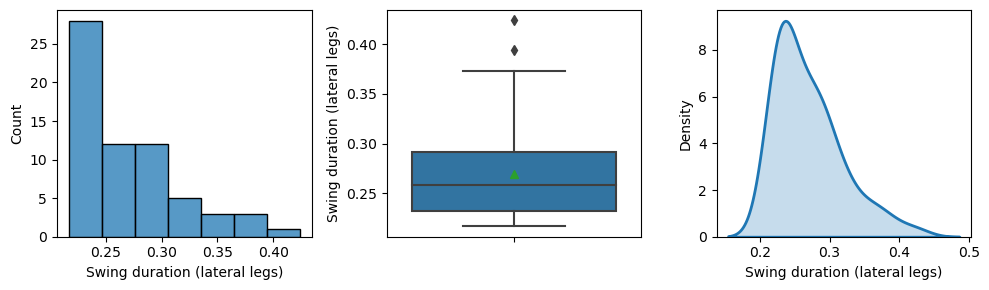

In [17]:
# looking at ALL data for a specified column
col = 'Swing duration (lateral legs)'
f,[a1,a2,a3] = plt.subplots(1,3,figsize=(10,3))
a1=sns.histplot(ax=a1, x=df[col])
a2=sns.boxplot(ax=a2, y=df[col], showmeans=True)
a3=sns.kdeplot(ax=a3, x=df[col], fill=True, linewidth=2);
plt.tight_layout()
plt.show()

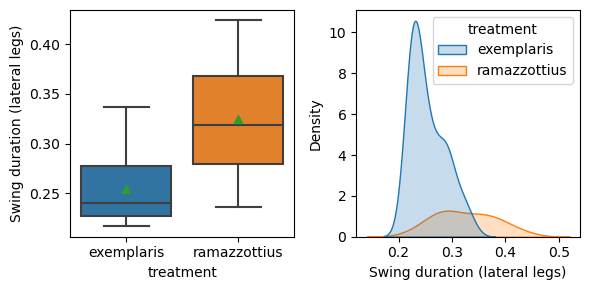

In [18]:
# comparing control vs. treatment for a specified column (col)
f,(a1,a2) = plt.subplots(1,2,figsize=(6,3))
sns.boxplot(ax=a1, x=df['treatment'], y=df[col], showmeans=True)
sns.kdeplot(ax=a2, x=col, hue='treatment', data=df, fill=True)
plt.tight_layout()
plt.show()

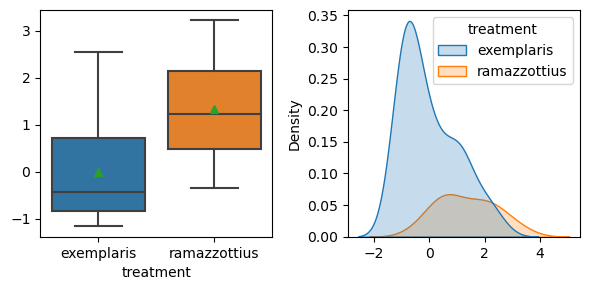

In [19]:
# Converting to ZSCORES (ended up not going in this direction . . . )
f,(a1,a2) = plt.subplots(1,2,figsize=(6,3))

conditions = df['Condition'].values
zscores = np.zeros(len(df[col].values))
control_data = df[df['Condition']==0][col].values
exp_data = df[df['Condition']==1][col].values
control_mean = np.nanmean(control_data)
control_std = np.nanstd(control_data)
exp_std = np.nanstd(exp_data)

for i, val in enumerate(df[col].values):
    if conditions[i] == 0: # control
        zscores[i] = (val-control_mean) / control_std
    elif conditions[i] == 1: # exp
        zscores[i] = (val-control_mean) / exp_std

sns.boxplot(ax=a1, x=df['treatment'], y=zscores, showmeans=True)
sns.kdeplot(ax=a2, x=zscores, hue='treatment', data=df, fill=True)
plt.tight_layout()
plt.show()

In [20]:
# T-test using fancy statsmodels
control_data = df[df['Condition']==0][col].values
exp_data = df[df['Condition']==1][col].values
levene=stats.levene(control_data, exp_data)
if levene.pvalue < 0.1:
    var = 'unequal'
    print('unequal variance')
else:
    var = 'pooled'
model = sms.CompareMeans.from_data(control_data, exp_data)
print(model.summary(usevar=var))

unequal variance
                          Test for equality of means                          
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
subset #1     -0.0704      0.015     -4.589      0.000      -0.103      -0.038


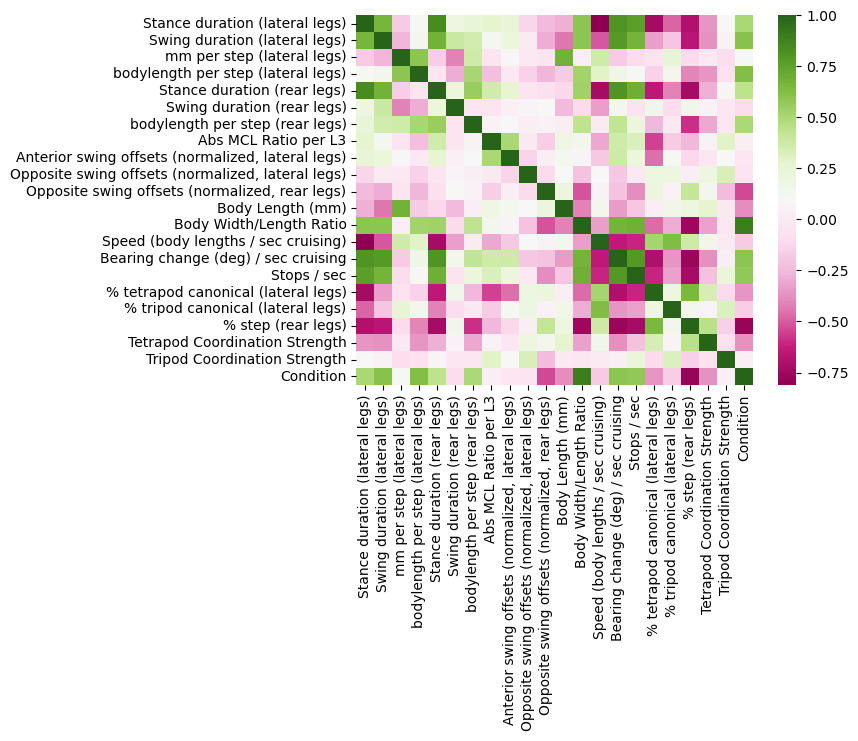

In [21]:
# looking for correlations within the dataset
corrmat = df.corr(numeric_only=True)
sns.heatmap(corrmat,cmap='PiYG') # 'bwr' # https://matplotlib.org/stable/users/explain/colors/colormaps.html
plt.show()

# Linear Regression 
### aka ANCOVA (analysis of covariance sez Brooks)

In [22]:
# Try a linear regression with X as 'Condition' and Y as a column of interest
import statsmodels.api as sm
Y = df[col] # col is from above, or reset here
X = df['Condition']
X = sm.add_constant(X)
model = sm.OLS(Y, X, missing='drop')
model_result = model.fit()
model_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                 
=========================================================================================
Dep. Variable:     Swing duration (lateral legs)   R-squared:                       0.373
Model:                                       OLS   Adj. R-squared:                  0.363
Method:                            Least Squares   F-statistic:                     36.89
Date:                           Sun, 18 Feb 2024   Prob (F-statistic):           8.34e-08
Time:                                   22:21:00   Log-Likelihood:                 118.96
No. Observations:                             64   AIC:                            -233.9
Df Residuals:                                 62   BIC:                            -229.6
Df Model:                                      1                                         
Covariance Type:                       nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2542      0.005     46.911      0.000       0.243       0.265
Condition      0.0704      0.012      6.074      0.000       0.047       0.094
==============================================================================
Omnibus:                        3.122   Durbin-Watson:                   1.090
Prob(Omnibus):                  0.210   Jarque-Bera (JB):                3.008
Skew:                           0.515   Prob(JB):                        0.222
Kurtosis:                       2.740   Cond. No.                         2.56
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

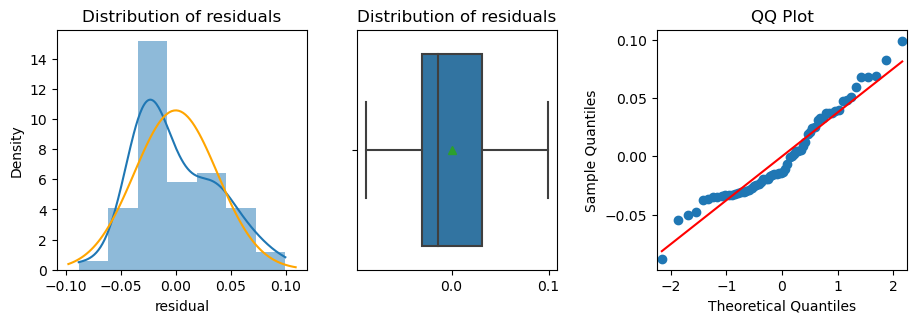

In [23]:
# check residuals from linear regression - are they normally distributed?
fig = plt.figure(figsize=(10,3))
ax1 = fig.add_axes([0.1,0.1,0.25,0.8])
ax2 = fig.add_axes([0.4,0.1,0.2,0.8])
ax3 = fig.add_axes([0.7,0.1,0.25,0.8])

mu, std = stats.norm.fit(model_result.resid)

# plot the residuals
sns.histplot(ax=ax1, x=model_result.resid, stat="density", linewidth=0, kde=True)
ax1.set(title="Distribution of residuals", xlabel="residual")

# plot corresponding normal curve
xmin, xmax = ax1.get_xlim() # the maximum x values from the histogram above
x = np.linspace(xmin, xmax, 100) # generate some x values
p = stats.norm.pdf(x, mu, std) # calculate the y values for the normal curve
sns.lineplot(ax=ax1, x=x, y=p, color="orange")

sns.boxplot(ax=ax2, x=model_result.resid, showmeans=True)
ax2.set(title="Distribution of residuals")

sm.qqplot(model_result.resid, line='s',ax=ax3)
ax3.set(title="QQ Plot")

plt.show()

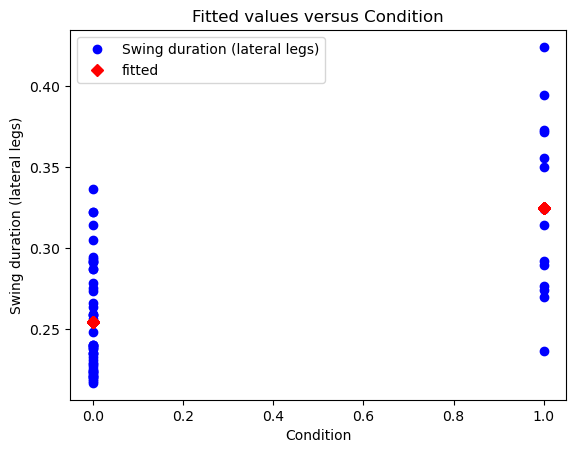

In [24]:
sm.graphics.plot_fit(model_result,1, vlines=False)
plt.show()

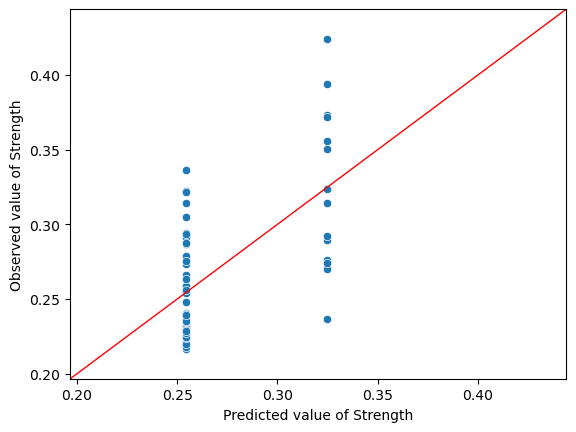

In [25]:
Y_max = Y.max()+0.02
Y_min = Y.min()-0.02

ax = sns.scatterplot(x=model_result.fittedvalues, y=Y)
ax.set(ylim=(Y_min, Y_max))
ax.set(xlim=(Y_min, Y_max))
ax.set_xlabel("Predicted value of Strength")
ax.set_ylabel("Observed value of Strength")

X_ref = Y_ref = np.linspace(Y_min, Y_max, 100)
plt.plot(X_ref, Y_ref, color='red', linewidth=1)
plt.show()

# multiple linear regression

In [26]:
# could do, for example, condition and speed vs. swing duration
# or condition and speed vs. swing duration
Y = df['Swing duration (lateral legs)']
X = df[['Condition','Speed (body lengths / sec cruising)']] 
X = sm.add_constant(X)
X.head(3)

,const,Condition,Speed (body lengths / sec cruising)
0,1.0,1,0.252280
1,1.0,1,0.174432
2,1.0,1,0.178078


In [27]:
model = sm.OLS(Y, X)
model_res = model.fit()
model_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                 
=========================================================================================
Dep. Variable:     Swing duration (lateral legs)   R-squared:                       0.540
Model:                                       OLS   Adj. R-squared:                  0.525
Method:                            Least Squares   F-statistic:                     35.82
Date:                           Sun, 18 Feb 2024   Prob (F-statistic):           5.14e-11
Time:                                   22:21:10   Log-Likelihood:                 128.87
No. Observations:                             64   AIC:                            -251.7
Df Residuals:                                 61   BIC:                            -245.3
Df Model:                                      2                                         
Covariance Type:                       nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                   0.3202      0.015     21.678      0.000       0.291       0.350
Condition                               0.0620      0.010      6.099      0.000       0.042       0.082
Speed (body lengths / sec cruising)    -0.2581      0.055     -4.707      0.000      -0.368      -0.148
==============================================================================
Omnibus:                        1.570   Durbin-Watson:                   1.307
Prob(Omnibus):                  0.456   Jarque-Bera (JB):                1.546
Skew:                           0.295   Prob(JB):                        0.462
Kurtosis:                       2.518   Cond. No.                         14.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

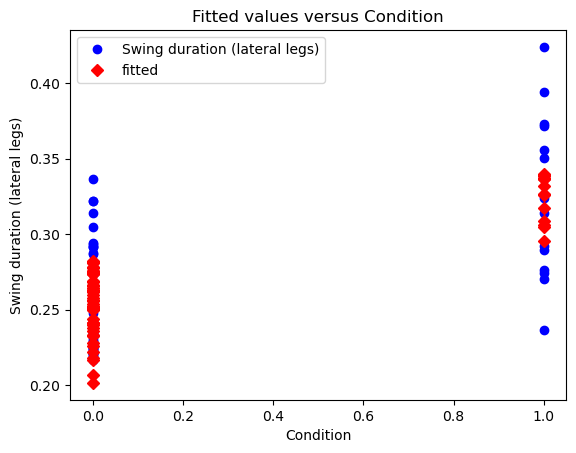

In [28]:
sm.graphics.plot_fit(model_res,1, vlines=False)
plt.show()

# Functions for pairwise boxplots and stats

Mann-Whitney U p-val 0.0


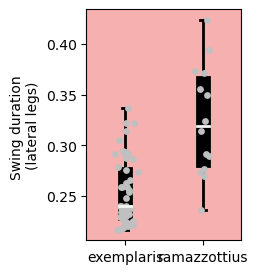

In [29]:
def compBoxPlot(ax,df,col): 
 
    # rearrange groupnames so 'control' is first
    groupnames = sorted(np.unique(df.treatment.values))
    if 'control' in groupnames:
        ind = groupnames.index('control')
        control = groupnames.pop(ind)
        groupnames.insert(0, control)
    
    # collect data
    data_to_plot = []
    for i,group in enumerate(groupnames):
        thisdata = df[df.treatment == group][col].values
        thisdata = thisdata[~np.isnan(thisdata)]
        data_to_plot.append(thisdata)
    
    # make boxplot
    bp = ax.boxplot(data_to_plot, patch_artist=True, showfliers=False)
    bp = gaitFunctions.formatBoxPlots(bp, ['black'], ['whitesmoke'], ['dimgrey'])
    
    # add scatter over the boxplot
    a = 1 # alpha
    sc = 'silver' # [ 0.76, 0.86, 0.85 ] # 'k' # color
    sz = 15 # marker size
    ji = 0.05 # jitter around midline
    for i, group in enumerate(groupnames):   
        xScatter = np.random.normal(i+1, ji, size=len(data_to_plot[i]))
        ax.scatter(xScatter, data_to_plot[i], s=sz, facecolors=sc, edgecolors=None , alpha = a, zorder = 2)
    
    # add axes labels
    ylab = col
    if '^2' in ylab:
        ylab = ylab.replace('^2','$^2$')
    if '/ sec cruising' in ylab:
        ylab = ylab.replace('/ sec', '/\nsec')
    if '(lateral' in ylab or '(rear' in ylab or '(normalized' in ylab:
        ylab = ylab.replace('(','\n(')
    ax.set_ylabel(ylab)
    ax.set_xticks(np.arange(len(groupnames))+1,groupnames)
    
    return ax, data_to_plot

def correctMultipleTests(ps,method): # method is 'bonferroni' or 'benjamini-hochberg' or 'benjamini-yekutieli'
    if method == 'bonferroni':
        adj_ps = [x*len(ps) for x in ps]
    elif method == 'benjamini-hochberg' or method == 'bh':
        adj_ps = [x for x in stats.false_discovery_control(ps)]
    elif method == 'benjamini-yekutieli' or method == 'by':
        adj_ps = [x for x in stats.false_discovery_control(ps, method='by')]
    else:
        print('No pvalue adjustment')
        adj_ps = ps
    return adj_ps

def facecolorPval(ax,pval):
    
    if pval < 0.001:
        fc = '#f7b0b0' # pinkish
    elif pval < 0.01:
        fc = '#fcca74' # orange-ish
    elif pval < 0.05:
        fc = '#f6f7a1' # yellow-ish
    else:
        fc = 'white'
    
    ax.set_facecolor(fc)

    return ax

def boxArray(maxcols,df,to_compare):

    if len(to_compare) % maxcols == 0:
        numrows = int(len(to_compare) / maxcols)
        cushion = 0
    else:
        numrows = int(len(to_compare) / maxcols) + 1
        cushion = maxcols - (len(to_compare) % maxcols)
    rows,cols = [numrows,maxcols]
    f,axes = plt.subplots(rows,cols,figsize = (8,2*numrows))
    axes_list = axes.reshape(1,len(to_compare)+cushion)[0]
    pvals = []
    tests = []
    for i, col in enumerate(to_compare):
        axes_list[i], data_to_plot = compBoxPlot(axes_list[i], df, col)
        pval,test = pairwiseStats(data_to_plot)# ,'kw')
        pvals.append(pval)
        tests.append(test)
        axes_list[i].yaxis.label.set_size(tick_fontsize)
        axes_list[i].tick_params(axis='both', which='major', labelsize=tick_fontsize)
    for i in np.arange(cushion):
        axes_list[-(i+1)].set_axis_off()
    print(tests)
    print([np.round(x,3) for x in pvals])

    # adjust p-values for multiple hypothesis testing
    adj_ps = correctMultipleTests(pvals,'by') # 'bonferroni' or 'bh' or 'by'
    print([np.round(x,3) for x in adj_ps])

    # recolor axes based on p-vals
    if cushion != 0:
        axes_list = axes_list[:-cushion]
    for i, ax in enumerate(axes_list):
        ax = facecolorPval(ax,adj_ps[i])

    plt.tight_layout()
    plt.show()


f,ax = plt.subplots(1,1,figsize=(2,3))
ax, data_to_plot = compBoxPlot(ax,df,'Swing duration (lateral legs)')
pval, test = pairwiseStats(data_to_plot)
ax = facecolorPval(ax,pval)
print(test, 'p-val', np.round(pval,4))
plt.show()


# Arrays of boxplots

['T-test', 'Mann-Whitney U', 'Mann-Whitney U', 'T-test', 'Mann-Whitney U']
[0.001, 0.0, 0.175, 0.0, 0.0]
[0.002, 0.0, 0.4, 0.0, 0.0]


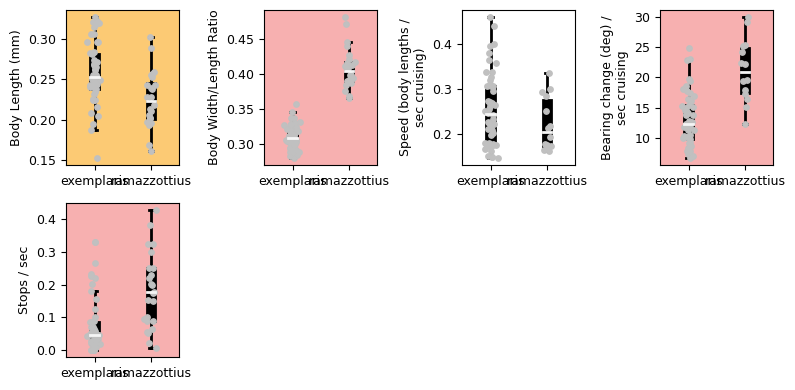

In [30]:
boxArray(4,path_summaries_df,path_cols)

['T-test', 'Mann-Whitney U', 'T-test', 'Mann-Whitney U', 'Mann-Whitney U', 'T-test', 'Mann-Whitney U', 'T-test', 'T-test', 'Mann-Whitney U', 'Mann-Whitney U']
[0.0, 0.0, 0.384, 0.0, 0.007, 0.444, 0.004, 0.808, 0.784, 0.69, 0.085]
[0.0, 0.0, 1.0, 0.0, 0.043, 1.0, 0.033, 1.0, 1.0, 1.0, 0.469]


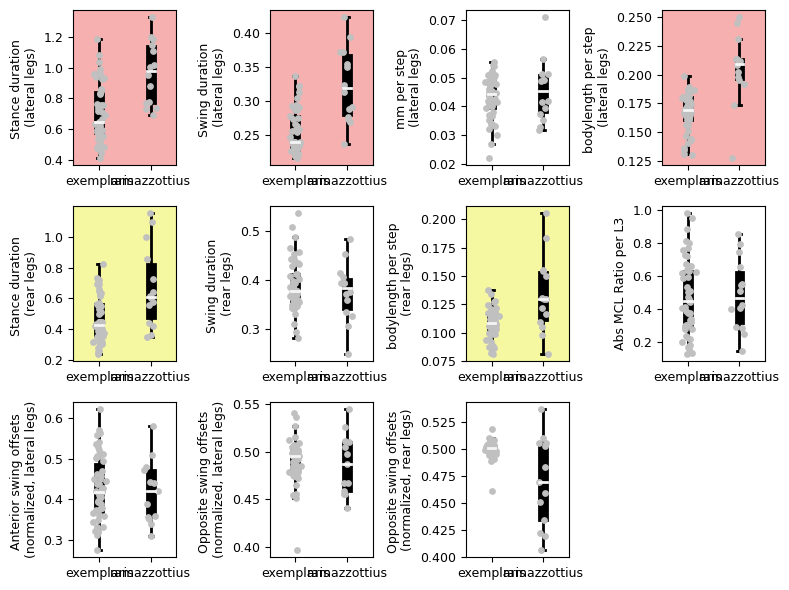

In [31]:
boxArray(4,step_summaries_df,step_cols)

['T-test', 'Mann-Whitney U', 'Mann-Whitney U', 'T-test', 'Mann-Whitney U']
[0.003, 0.366, 0.0, 0.003, 0.601]
[0.012, 1.0, 0.0, 0.012, 1.0]


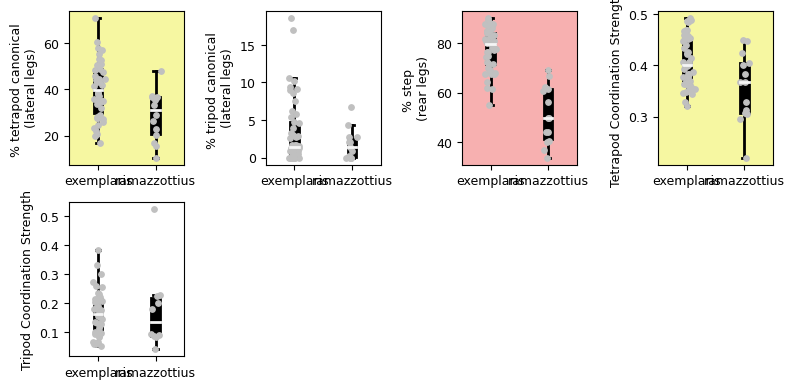

In [32]:
boxArray(4,gait_summaries_df,gait_cols)

# Phenotype Heatmaps and Multiple Comparisons


Body Length (mm) -0.1956762069129445 0.005896814713267263
Body Width/Length Ratio 0.39572732527412047 3.3986419108141933e-10
Speed (body lengths / sec cruising) -0.19643565468554477 0.9573853015822388
Bearing change (deg) / sec cruising 0.7031468939077348 5.477129604720457e-06
Stops / sec 1.280166084672584 0.0005111139554146062
Stance duration (lateral legs) 0.459412724777005 0.0003961027831254081
Swing duration (lateral legs) 0.3525780115756525 0.000396291525115142
mm per step (lateral legs) 0.07102022808450104 1.0
bodylength per step (lateral legs) 0.2938519440236425 0.0001260785573767969
Stance duration (rear legs) 0.5299471638254781 0.04162148588975125
Swing duration (rear legs) -0.046750271133879355 1.0
bodylength per step (rear legs) 0.30684760253443527 0.027448750428951764
Abs MCL Ratio per L3 0.049410810585690745 1.0
Anterior swing offsets (normalized, lateral legs) -0.023164534082477806 1.0
Opposite swing offsets (normalized, lateral legs) -0.009524461812798672 1.0
Opposite s

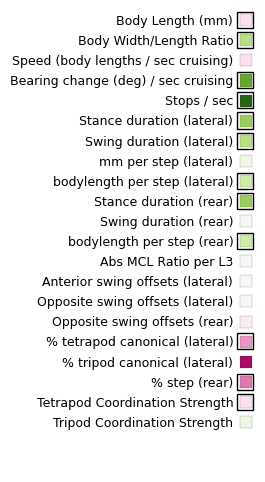

In [34]:
# function for Z-scores, Z-score plots, and combining dataframes
def pairZscore(data,conditions):
    # data is a vector of numbers for control and experimental treatments
    # conditions is a vector of 0 and 1 (for pairs), where
    # 'control' is assumed to be 0
    control_data = data[np.where(conditions==0)]
    exp_data = data[np.where(conditions==1)]
    control_mean = np.nanmean(control_data)
    control_std = np.nanstd(control_data)
    exp_std = np.nanstd(exp_data)
    zscores = np.zeros(len(data))
    for i, d in enumerate(data):
        if conditions[i] == 0: # control!
            zscores[i] = (d-control_mean)/control_std
        elif conditions[i] == 1:
            zscores[i] = (d-control_mean)/exp_std
    return zscores

def getLevelColor(cmap,level):
    colormap = mpl.colormaps[cmap]
    level_boundaries = np.linspace(-0.95,0.95,20)
    cmap_levels = np.linspace(0,1,21)
    
    for i, boundary in enumerate(level_boundaries):
        if level <= boundary:
            return colormap(cmap_levels[i])
        
    return colormap(cmap_levels[-1])

def ratioPlot(ax, dflist, colslist, control='control', cmap='bwr', plotLabels = True):
    '''
    Parameters
    
    dflist: a list of dataframes, usually path_summaries_df, step_summaries_df, gait_summaries_df
         or pdf, sdf, gdf
    colslist: a list of lists of columns within these dataframes
    '''

    # find total number of comparisons
    total_cols = np.sum(np.array([len(x) for x in colslist]))
    
    # make empty containers for zscore_ratios and pvals and labels
    log2ratios = np.zeros(total_cols)
    pvals = np.zeros(total_cols)
    labels = np.empty(total_cols, dtype='object')
    idx = 0 # index for these containers
    
    # go through dflist and colslist
    for i,columns in enumerate(colslist):
        
        df = dflist[i].copy()

        # set control to 0 and experimental to 1
        df['Condition'] = np.where(df['treatment'] == control, 0, 1)
        conditions = df['Condition'].values

        for column in columns:
            
            data = df[column].values
            
            control_data = data[np.where(conditions==0)]
            exp_data = data[np.where(conditions==1)]
            
            # remove nan (no data)
            control_data = control_data[~np.isnan(control_data)]
            exp_data = exp_data[~np.isnan(exp_data)]
    
            # get pval for this column            
            pval, test = pairwiseStats([control_data, exp_data])
#             print(column, pval, test) # testing
            pvals[idx] = pval
    
            # get label for this column
            labels[idx] = column
            
            # get log2(experiment/control) ratio for this column (CLR causes trouble!)
            log2ratios[idx] = np.log2(np.mean(exp_data)/np.mean(control_data))          
    
            idx += 1

    # correct pvals for multiple comparisons
    adj_pvals = correctMultipleTests(pvals,'by')
    
    ytext = 0.25 # level for text above the lower edge of each square

    ylevel = len(labels) + 1
    
    big_box = 0.4
    small_box = 0.3

    # go through data
    for i, label in enumerate(labels):
    
        # plot a square, with color scaled to log2_ratio
        square_color = getLevelColor(cmap, log2ratios[i])
        
        square_center_x = 0.5
        square_center_y = ylevel + 0.5
        
        # plot a thick border if significant
        if adj_pvals[i] < 0.05:
            linewidth = 0.1 # 0.1 or 3 or 5
            ec = 'k'
#             ax.text(0.25,ylevel,s='*',fontsize=axis_fontsize) # or comment out
            square = patches.Rectangle((square_center_x-big_box, square_center_y-big_box), 
                                       2*big_box, 2*big_box, linewidth=1, edgecolor='k', facecolor='w')        
            ax.add_patch(square)
        else:
            linewidth = 0.1
            ec = 'k'
        
        square = patches.Rectangle((square_center_x-small_box+0.025, square_center_y-small_box-0.01), 
                                   2*small_box, 2*small_box, linewidth=linewidth, 
                                   edgecolor=ec, facecolor=square_color)        
        ax.add_patch(square)
        
        # plot the text
        if plotLabels:
            label = label.replace('normalized, ','')
            label = label.replace(' legs','')
            ax.text(-0.1,ylevel+ytext,s=label,fontsize=tick_fontsize, horizontalalignment='right')

        # plot horizontal lines to separate the different dataframes ?
        
        # update ylevel
        ylevel = ylevel-1

    ax.set_ylim([0,len(labels) + 2])
    ax.set_aspect('equal')
#     ax.set_xlim([0,1])
    ax.set_axis_off()
    return ax, log2ratios, pvals, adj_pvals, labels

dfs = [path_summaries_df, step_summaries_df, gait_summaries_df]
cols = [path_cols, step_cols, gait_cols]
f,ax = plt.subplots(figsize=(2,6))
print()
ax, log2_ratios, pvals, adj_pvals, labels = ratioPlot(ax, dfs, cols, 
                                                      control, 'PiYG', True) # 'control' or 'exemplaris' or 'adult'

for i, lab in enumerate(labels):
    print(lab, log2_ratios[i], adj_pvals[i])
plt.show()

# ratio legend

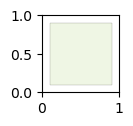

In [35]:
c = getLevelColor('PiYG', 0.1)
f,ax = plt.subplots(1,1,figsize=(1,1))
square = patches.Rectangle((0.1, 0.1), 0.8, 0.8, linewidth=0.1, edgecolor='k', facecolor=c)        
ax.add_patch(square)
plt.show()

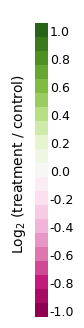

In [36]:
levels = np.linspace(-1,1,21)
ylevel = 0
f,ax = plt.subplots(figsize=(1,4))
cmap = 'PiYG'
for i, level in enumerate(levels):
    square_color = getLevelColor(cmap, level)
    square = patches.Rectangle((0.1, ylevel), 1, 1, linewidth=0.1, edgecolor=None, facecolor=square_color)        
    ax.add_patch(square)
    tenx = int(np.round(level*10,1))
    if tenx % 2 == 0:
        ax.text(1.15,ylevel+0.15,str(np.round(level,1)),fontsize=tick_fontsize)
    ylevel += 1
ax.set_ylabel('Log$_{2}$ (treatment / control)')
ax.set_ylim([0,len(levels)+1])
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)
ax.spines.bottom.set_visible(False)
ax.spines.left.set_visible(False)
ax.set_aspect('equal')
ax.set_yticks([])
ax.set_xticks([])
# ax.set_axis_off()
plt.show()

# Pairwise gait style comparisons

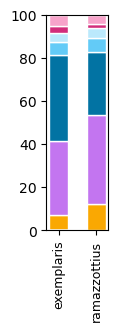

In [37]:
def gaitStylePercentagesPlot(ax, df, control='control', leg_set='lateral', addLegend=True):
    
    barWidth = 0.5
    df = df.copy()
    ylab = 'Percentage in Gait Style'

    # set up colors
    if leg_set in ['rear','two','human']:
        all_combos, combo_colors = gaitFunctions.get_gait_combo_colors('rear')
        columns = ['% stand (rear legs)', '% step (rear legs)','% hop (rear legs)']
        ylab += '\n(Rear Legs)'
    elif leg_set in ['four','cat','dog','tetrapod']:
        all_combos, combo_colors = gaitFunctions.get_gait_combo_colors('four')
    elif leg_set in ['lateral','insect','six']:
        all_combos, combo_colors = gaitFunctions.get_gait_combo_colors('lateral')
        columns = [x for x in gdf.columns if '%' in x]
        columns = [x for x in columns if 'lateral' in x]
        columns = [x for x in columns if 'total' not in x]
        ylab += '\n(Lateral Legs)'
#     print(combo_colors) # test OK
#     print(columns) # test OK
    
    # set control to 0 and experimental to 1
    df['Condition'] = np.where(df['treatment'] == control, 0, 1)
    conditions = df['Condition'].values
    exp_name = np.unique(df.treatment.values[np.where(conditions==1)])[0]
#     print(exp_name)
  
    bottoms = [0,0]
    for c, column in enumerate(columns):
        data = df[column].values
        control_mean = np.mean(data[np.where(conditions==0)])
        exp_mean = np.mean(data[np.where(conditions==1)])
        for i, val in enumerate([control_mean, exp_mean]):
            if i == 0: # plot for legend
                ax.bar(i, 0, bottom = 0, color = combo_colors[all_combos[c]],
                       edgecolor='white', width=barWidth, label=all_combos[c].replace('_',' '))
            ax.bar(i, val, bottom=bottoms[i], color=combo_colors[all_combos[c]],
                  edgecolor='white',width=barWidth)
            bottoms[i] += val
    
    ax.set_xticks(np.arange(2))
    ax.set_xticklabels([control, exp_name], fontsize=tick_fontsize, rotation=90)
    
    # Add a legend
    if addLegend:
        handles, labels = ax.get_legend_handles_labels()
        ax.legend(reversed(handles), reversed(labels), loc='upper left',
                  bbox_to_anchor=(1,1), ncol=1, fontsize=tick_fontsize)
        ax.set_ylabel(ylab, fontsize=axis_fontsize)
    ax.set_ylim([0,100]) 

    return ax

df = gait_summaries_df.copy()
f, ax = plt.subplots(1,1,figsize=(0.8,2.8))
ax = gaitStylePercentagesPlot(ax, df, control, 'lateral', False) # False to hide legend and Y label
plt.show()

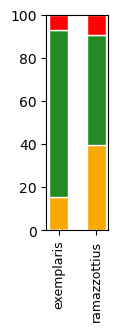

In [38]:
df = gait_summaries_df.copy()
f, ax = plt.subplots(1,1,figsize=(0.8,2.8))
ax = gaitStylePercentagesPlot(ax, df, control, 'rear', False) # False to hide legend and Y label
plt.show()

# ternary plots and compositional statistics

In [39]:
from gaitFunctions import colorBoxplot
from gaitFunctions import pairwiseStats
import mpltern
import composition_stats as cs
gait_summaries_df.head(5)

,Identifier,treatment,individual,date,Number of frames,% stand (lateral legs),% pentapod (lateral legs),% tetrapod canonical (lateral legs),% tetrapod gallop (lateral legs),% tetrapod other (lateral legs),...,CLR pentapod (lateral legs),CLR tetrapod canonical (lateral legs),CLR tetrapod gallop (lateral legs),CLR tetrapod other (lateral legs),CLR tripod canonical (lateral legs),CLR tripod other (lateral legs),CLR other (lateral legs),CLR stand (rear legs),CLR step (rear legs),CLR hop (rear legs)
0,hp_14sep_tardigrade01_ramazzottius,ramazzottius,tardigrade01,14sep,357,2.240896,24.089636,36.694678,8.123249,11.764706,...,-0.565099,0.154793,1.745756,1.685388,1.965275,2.297787,1.960805,-0.074672,-0.153803,1.217059
1,hp_14sep_tardigrade02_ramazzottius,ramazzottius,tardigrade02,14sep,428,11.915888,48.130841,26.401869,2.803738,7.009346,...,0.127043,-0.174404,0.681980,1.167529,0.397593,0.892624,-0.956284,0.175443,-0.061593,-0.023720
2,jc_14sep_tardigrade03_ramazzottius,ramazzottius,tardigrade03,14sep,559,6.440072,41.681574,48.121646,0.894454,0.178891,...,-0.016821,0.425893,-0.460515,-2.500695,0.823714,-0.578375,-0.956284,-0.467127,0.390776,-0.290746
3,rm_14sep_tardigrade01_ramazzottius,ramazzottius,tardigrade01,14sep,285,13.333333,56.140351,28.771930,0.000000,1.754386,...,0.280975,-0.088439,-3.527028,-0.217597,-3.118267,-3.134062,-0.956284,0.380887,-0.237440,-1.265744
4,sp_14sep_tardigrade04_ramazzottius,ramazzottius,tardigrade04,14sep,682,15.249267,50.439883,22.873900,6.744868,1.906158,...,0.173902,-0.317843,1.559808,-0.134626,-0.068314,0.522027,0.908046,-0.014532,0.062059,0.363151


In [40]:
exp = gait_summaries_df[gait_summaries_df['treatment']==experimental]
con = gait_summaries_df[gait_summaries_df['treatment']==control]
print(np.shape(exp), np.shape(con))

(14, 33) (50, 33)


In [41]:
stand_rear_exp = exp['% stand (rear legs)'].values
stand_rear_con = con['% stand (rear legs)'].values
step_rear_exp = exp['% step (rear legs)'].values
step_rear_con = con['% step (rear legs)'].values
hop_rear_exp = exp['% hop (rear legs)'].values
hop_rear_con = con['% hop (rear legs)'].values
exp_color = 'tab:red'
con_color = 'tab:blue'

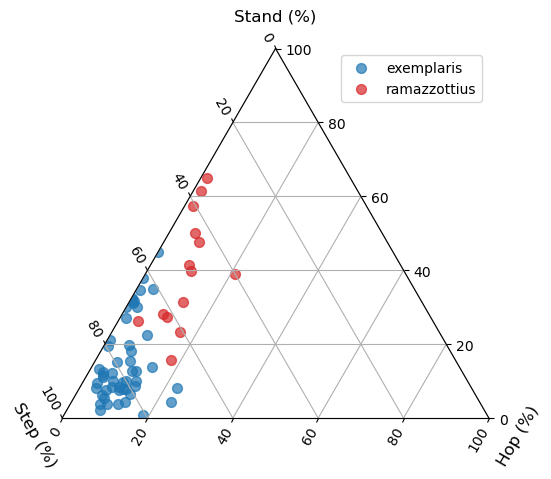

In [42]:
ax = plt.subplot(projection="ternary", ternary_sum=100.0)

ax.scatter(stand_rear_con, step_rear_con, hop_rear_con,c=con_color,s=50,alpha=0.7,label=control)
ax.scatter(stand_rear_exp, step_rear_exp, hop_rear_exp,c=exp_color,s=50,alpha=0.7,label=experimental)

ax.set_tlabel("Stand (%)", fontsize=12)
ax.set_llabel("Step (%)", fontsize=12)
ax.set_rlabel("Hop (%)", fontsize=12)

ax.grid()
ax.legend()

plt.show()

In [43]:
stand_lateral_exp = exp['% stand (lateral legs)'].values
stand_lateral_con = con['% stand (lateral legs)'].values

pentapod_exp = exp['% pentapod (lateral legs)'].values
pentapod_con = con['% pentapod (lateral legs)'].values

tetrapod_canonical_exp = exp['% tetrapod canonical (lateral legs)'].values
tetrapod_canonical_con = con['% tetrapod canonical (lateral legs)'].values

tetrapod_gallop_exp = exp['% tetrapod gallop (lateral legs)'].values
tetrapod_gallop_con = con['% tetrapod gallop (lateral legs)'].values

tetrapod_other_exp = exp['% tetrapod other (lateral legs)'].values
tetrapod_other_con = con['% tetrapod other (lateral legs)'].values

tetrapod_total_exp = exp['% tetrapod total (lateral legs)'].values
tetrapod_total_con = con['% tetrapod total (lateral legs)'].values

tripod_canonical_exp = exp['% tripod canonical (lateral legs)'].values
tripod_canonical_con = con['% tripod canonical (lateral legs)'].values

tripod_other_exp = exp['% tripod other (lateral legs)'].values
tripod_other_con = con['% tripod other (lateral legs)'].values

tripod_total_exp = exp['% tripod total (lateral legs'].values
tripod_total_con = con['% tripod total (lateral legs'].values

# 'total' here is pentapod + tetrapod + tripod
total_exp =  pentapod_exp + tetrapod_total_exp + tripod_total_exp
total_con =  pentapod_con + tetrapod_total_con + tripod_total_con

pentapod_percent_exp = pentapod_exp / total_exp
tetrapod_percent_exp = tetrapod_total_exp / total_exp
tripod_percent_exp = tripod_total_exp / total_exp
# print(pentapod_percent_exp + tetrapod_percent_exp + tripod_percent_exp)# testing OK

pentapod_percent_con = pentapod_con / total_con
tetrapod_percent_con = tetrapod_total_con / total_con
tripod_percent_con = tripod_total_con / total_con
# print(pentapod_percent_con + tetrapod_percent_con + tripod_percent_con)# testing OK


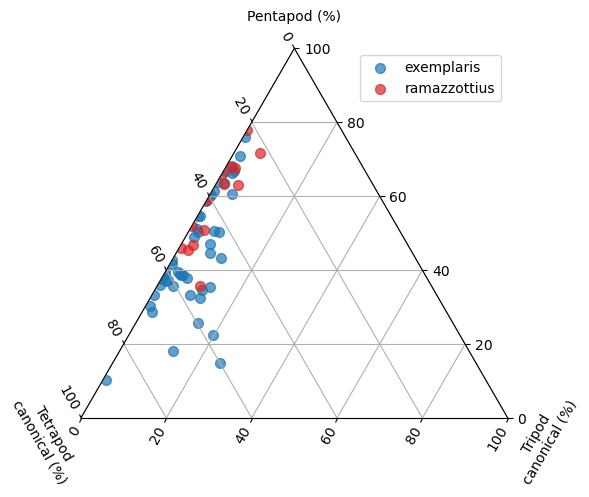

In [44]:
ax = plt.subplot(projection="ternary", ternary_sum=100.0)

# total
# ax.scatter(pentapod_percent_con, tetrapod_percent_con, tripod_percent_con,c=con_color,s=10,label=control)
# ax.scatter(pentapod_percent_exp, tetrapod_percent_exp, tripod_percent_exp,c=exp_color,s=10,label=experimental)
# ax.set_tlabel("Pentapod (%)")
# ax.set_llabel("Tetrapod (%)")
# ax.set_rlabel("Tripod (%)")

# canonical
ax.scatter(pentapod_con, tetrapod_canonical_con, tripod_canonical_con, c=con_color,s=50,alpha=0.7,label=control)
ax.scatter(pentapod_exp, tetrapod_canonical_exp, tripod_canonical_exp, c=exp_color,s=50,alpha=0.7,label=experimental)
ax.set_tlabel("Pentapod (%)")
ax.set_llabel("Tetrapod\ncanonical (%)")
ax.set_rlabel("Tripod\ncanonical (%)")

ax.grid()
ax.legend()

plt.show()

# compositional data = log ratio transform

In [56]:
# rear legs
labs = ['stand','step','hop']
treatments = gait_summaries_df.treatment.values
control_ix = np.where(treatments == control)[0]
exp_ix = np.where(treatments == experimental)[0]
rear_percentages = np.hstack([[
    gait_summaries_df['% stand (rear legs)'].values,
    gait_summaries_df['% step (rear legs)'].values,
    gait_summaries_df['% hop (rear legs)'].values
                             ]])
print(np.sum(rear_percentages,0)) # should all be 100 ... check!
rear_percentages_nozeros = cs.multiplicative_replacement(rear_percentages)
print(np.sum(rear_percentages_nozeros,0)) # should still be 100-ish ... check!
rear_clr = cs.clr(rear_percentages_nozeros)

[100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100.
 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100.
 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100.
 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100.
 100. 100. 100. 100. 100. 100. 100. 100.]
[ 99.97948398  99.99406761  99.99545785  99.99828673  99.99126535
  99.99007192  99.99863418  99.99800702  99.99081283  99.99181325
  99.98285203  99.98763021  99.98433322  99.98928666  99.99818483
  99.99428607  99.99903502  99.98925781  99.99863227  99.99071578
  99.99491556  99.97771095 100.00024414  99.99903583 100.00024414
  99.99082623 100.00024414  99.99967008  99.99247313  99.99362382
  99.99896933  99.99186198  99.98812017  99.99621487  99.98904616
  99.99005682  99.99457465  99.98748523 100.00024414  99.99673642
  99.99161401  99.99390768  99.98193245  99.99306267  99.98932154
  99.97708278  99.98760164  99.99032564  99.99310443  99.99319094
  99.9990488  

In [57]:
print(gait_summaries_df.columns)

Index(['Identifier', 'treatment', 'individual', 'date', 'Number of frames',
       '% stand (lateral legs)', '% pentapod (lateral legs)',
       '% tetrapod canonical (lateral legs)',
       '% tetrapod gallop (lateral legs)', '% tetrapod other (lateral legs)',
       '% tetrapod total (lateral legs)', '% tripod canonical (lateral legs)',
       '% tripod other (lateral legs)', '% tripod total (lateral legs',
       '% other (lateral legs)', '% stand (rear legs)', '% hop (rear legs)',
       '% step (rear legs)', 'Tetrapod Coordination Strength',
       'Tetrapod Bout Speed (bodylength / s)', 'Tripod Coordination Strength',
       'Tripod Bout Speed (bodylength / s)', 'CLR stand (lateral legs)',
       'CLR pentapod (lateral legs)', 'CLR tetrapod canonical (lateral legs)',
       'CLR tetrapod gallop (lateral legs)',
       'CLR tetrapod other (lateral legs)',
       'CLR tripod canonical (lateral legs)',
       'CLR tripod other (lateral legs)', 'CLR other (lateral legs)',
       'CLR

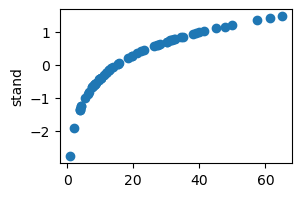

In [58]:
# rear_clr should still be proportional to rear_percentages, no?
col = 0 # 0=stand, 1=step, 2=hop
f,a = plt.subplots(1,1,figsize=(3,2))
a.scatter(rear_percentages[0],rear_clr[0])
a.set_ylabel(labs[col])
plt.show()
# yes, in a loggish way

p =  0.0 by Mann-Whitney U


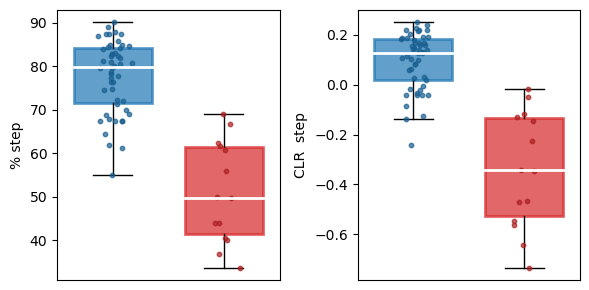

In [59]:
# REAR boxplot a:  % for ex vs. ram, 2: clr for ex vs. ram
col = 1

f,[a1,a2] = plt.subplots(1,2,figsize=(6,3))
rear_boxdata = [rear_percentages[col][control_ix], rear_percentages[col][exp_ix]]
a1,bp1=colorBoxplot(a1,rear_boxdata,[con_color,exp_color],10,0.8)
a1.set_ylabel('% ' + labs[col])

rear_clr_boxdata = [rear_clr[col][control_ix], rear_clr[col][exp_ix]]
a2,bp2=colorBoxplot(a2,rear_clr_boxdata,[con_color,exp_color],10,0.8)
a2.set_ylabel('CLR  '+ labs[col])

plt.tight_layout()

pval, test = pairwiseStats(rear_clr_boxdata)
print('p = ', np.round(pval,6), 'by', test)
plt.show()

In [60]:
# LATERAL legs
lateral_percentages = np.hstack([[
    gait_summaries_df['% stand (lateral legs)'].values,
    gait_summaries_df['% pentapod (lateral legs)'].values,
    gait_summaries_df['% tetrapod canonical (lateral legs)'].values,
    gait_summaries_df['% tetrapod gallop (lateral legs)'].values,
    gait_summaries_df['% tetrapod other (lateral legs)'].values,
    gait_summaries_df['% tripod canonical (lateral legs)'].values,
    gait_summaries_df['% tripod other (lateral legs)'].values,
    gait_summaries_df['% other (lateral legs)'].values
                             ]])
labs = ['stand','pentapod','tetrapod canonical','tetrapod gallop','tetrapod other',
       'tripod canonical','tripod other',' other']

print(np.sum(lateral_percentages,0)) # should all be 100 ... check!
lateral_percentages_nozeros = cs.multiplicative_replacement(lateral_percentages)
print(np.sum(lateral_percentages_nozeros,0)) # should still be 100-ish ... check!
lateral_clr = cs.clr(lateral_percentages_nozeros)

[100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100.
 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100.
 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100.
 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100.
 100. 100. 100. 100. 100. 100. 100. 100.]
[ 99.95691636  99.99157373  99.9926011  100.00097656  99.98532292
  99.97492752  99.99111021  99.98435562  99.96502664  99.98664829
  99.97703916  99.99142795  99.97798426  99.99616174  99.98964263
  99.9726701   99.99252428  99.9547526   99.98403649  99.96410961
  99.97365736  99.9051771   99.99296729  99.98388775  99.99313709
  99.9983428   99.99232996  99.99537452  99.99831997  99.99022599
  99.98893895  99.98201497  99.97155132  99.97672905  99.98231605
  99.99165483  99.98436702  99.96455858  99.99015232  99.97652045
  99.99034393  99.97623325  99.9296166   99.98087787  99.96990224
  99.9416091   99.95756239  99.96285412  99.96571967  99.9684633
  99.98209213  

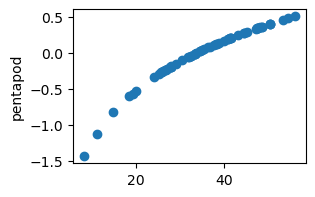

In [61]:
# lateral clr should still be proportional to lateral percentages, no?
col = 1
f,a = plt.subplots(1,1,figsize=(3,2))
a.scatter(lateral_percentages[col],lateral_clr[col])
a.set_ylabel(labs[col])
plt.show()
# yes, in a loggish way

p =  0.001584 by T-test


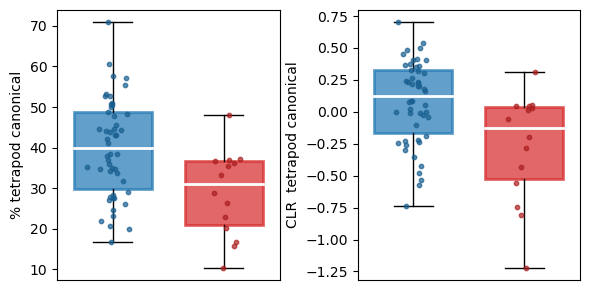

In [63]:
# LATERAL boxplot a:  % for ex vs. ram, 2: clr for ex vs. ram
col = 2 # 0=stand 1=pentapod 2=tetrapod canonical 3=tetrapod gallop 4=tetrapod other
#         5=tripod canonical 6=tripod other 7=other
f,[a1,a2] = plt.subplots(1,2,figsize=(6,3))
lateral_boxdata = [lateral_percentages[col][control_ix], lateral_percentages[col][exp_ix]]
a1,bp1=colorBoxplot(a1,lateral_boxdata,[con_color,exp_color],10,0.8)
a1.set_ylabel('% ' + labs[col])

lateral_clr_boxdata = [lateral_clr[col][control_ix], lateral_clr[col][exp_ix]]
a2,bp2=colorBoxplot(a2,lateral_clr_boxdata,[con_color,exp_color],10,0.8)
a2.set_ylabel('CLR  '+ labs[col])

pval, test = pairwiseStats(lateral_clr_boxdata)
print('p = ', np.round(pval,6), 'by', test)

plt.tight_layout()
plt.show()

# SCRUNCH from Emma data of adults vs. juveniles

In [64]:
baby_scrunch_time = np.array([0.02542372881, 0.1206896552, 0.08064516129,0.03921568627,0,0,0,0.03703703704,0.02575107296,0.01652892562,0.01,0.0701754386,0.08333333333,0.03703703704,0.08571428571])
baby_st_time = np.array([0.07627118644,0,
0.008064516129,
0.01307189542,
0.06140350877,
0,
0.04,
0.02469135802,
0.02575107296,
0.03305785124,
0.03,
0.01754385965,
0.02083333333,
0.03703703704,
0.02857142857])
adult_scrunch_time = np.array([
    0,
0,
0.02702702703,
0.07407407407,
0.05660377358,
0.01724137931,
0.06382978723,
0.075,
0,
0.1,
])
adult_st_time = np.array([
    0.01818181818,
0.01785714286,
0.02702702703,
0.03703703704,
0.05660377358,
0.08620689655,
0.06382978723,
0.05,
0,
0
])

Scrunch p =  0.911048 by Mann-Whitney U
Scrunch-turn p =  0.428013 by T-test


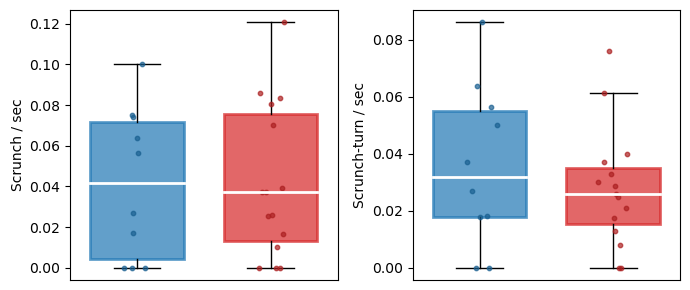

In [66]:
f,[a1,a2] = plt.subplots(1,2,figsize=(7,3))
scrunch_boxdata = [adult_scrunch_time, baby_scrunch_time]
st_boxdata = [adult_st_time, baby_st_time]

a1,bp1=colorBoxplot(a1,scrunch_boxdata,[con_color,exp_color],10,0.8)
a1.set_ylabel('Scrunch / sec')

a2,bp2=colorBoxplot(a2,st_boxdata,[con_color,exp_color],10,0.8)
a2.set_ylabel('Scrunch-turn / sec')

pval, test = pairwiseStats(scrunch_boxdata)
print('Scrunch p = ', np.round(pval,6), 'by', test)

pval, test = pairwiseStats(st_boxdata)
print('Scrunch-turn p = ', np.round(pval,6), 'by', test)

plt.tight_layout()
plt.show()
